# Gibbs sampler for AR 
Gibbs sampling is a numerical method that uses draws from conditional distributions to approximate joint and marginal distributions. 

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import seaborn as sns

In [2]:
import os

os.chdir("E:\\master\\timeseries\\bayesian")

In [3]:
os.getcwd()

'E:\\master\\timeseries\\bayesian'

In [4]:
data=pd.read_excel('inflation.xls', index_col=0)  

In [5]:
T=data.shape[0]

In [6]:
X=np.ones((T,1))

In [7]:
X=np.hstack((X,data.shift(1),data.shift(2)))

In [8]:
Y=data[3:]
X=X[3:]

In [9]:
T=X.shape[0]

In [151]:
B0=np.zeros((3,1))
sigma0=np.eye(3)
T0=1
D0=0.1
B=B0
sigma2=1
reps=5000
burn=4000
out1=[]
out2=[]
out3=[]

In [152]:
for i in range(reps):
    M=np.dot(np.linalg.inv(np.linalg.inv(sigma0)+(1/sigma2) * np.dot(X.T,X)),np.dot(np.linalg.inv(sigma0),B0)+(1/sigma2)*np.dot(X.T,Y))
    V=np.linalg.inv(np.linalg.inv(sigma0)+(1/sigma2)*np.dot(X.T,X))
    check=-1
    while check<0:
        B=(M+np.dot(np.random.normal(0,1,size=3),np.linalg.cholesky(V)))[:,0]
        b=np.vstack((np.hstack((B[1],B[2])),np.array([1,0])))
        ee=max(np.absolute(np.linalg.eig(b)[0]))
        if ee<=1:
            check=1

    resids=Y.Inflation-np.dot(X,B)
    T1=T0+T
    D1=D0+np.dot(resids.T,resids)
    z0=np.random.normal(size=T1)
    z0z0=np.dot(z0.T,z0)
    sigma2=D1/z0z0

    if i>burn:
        out1.append(B)
    
        out2.append(sigma2)
        #forcest 2 years
        yhat=np.zeros((14,1))
        yhat[0:2]=Y[-2:]
        cfactor=np.sqrt(sigma2)
        for m in range(2,14):
            yhat[m]=np.dot(np.hstack((1,yhat[m-1],yhat[m-2])),B)+np.random.normal(1)*cfactor
        
        out3.append(np.vstack((Y,yhat[2:])))
        
        
        
                
            

In [153]:
outx1=out1[0]
for i in range(1,len(out1)):
    outx1=np.vstack((outx1,out1[i]))

In [210]:
# import statistics as s
print(np.percentile(outx1[:,0],80),'\n',
np.percentile(outx1[:,1],80),'\n',
np.percentile(outx1[:,2],70))


0.2440668602286782 
 1.3807982261383354 
 -0.4715438245405253


In [155]:
x=[1,2,3,3]
s.mode(x)

3

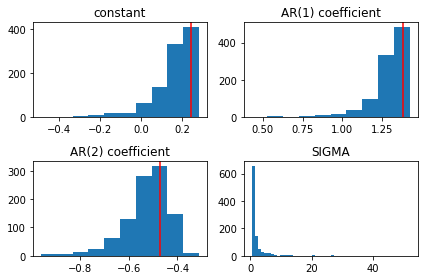

In [200]:
ax1=plt.subplot(221)
ax1.hist(outx1[:,0])
ax1.set_title('constant')
plt.axvline(np.percentile(outx1[:,0],80),color='red')
ax2=plt.subplot(222)
ax2.hist(outx1[:,1])
plt.axvline(np.percentile(outx1[:,1],80),color='red')
ax2.set_title("AR(1) coefficient")

ax3=plt.subplot(223)
ax3.hist(outx1[:,2])
plt.axvline(np.percentile(outx1[:,2],70),color='red')
ax3.set_title("AR(2) coefficient")
ax4=plt.subplot(224)
ax4.hist(out2,50)
ax4.set_title("SIGMA")


plt.tight_layout()
plt.show()


# Forecasting

In [201]:
outx=out3[0]
for i in range(1,len(out3)):
    outx=np.hstack((outx,out3[i]))


In [202]:
OUTX=np.percentile(outx,[10 ,20, 30, 40, 50, 60, 70, 80, 90],axis=1).T

In [203]:
T=np.arange(1947.25,2012.5,0.25)

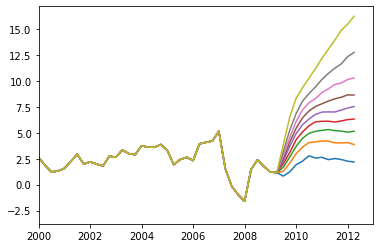

In [204]:
plt.plot(T,OUTX)
plt.xlim([2000,2013])
plt.show()